#Task Day 5
#Exploratory Data Analysis (EDA)

 Extract insights using visual and statistical exploration

In [52]:
#Import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
#Load csv file
df = pd.read_csv('/content/tested.csv')

In [54]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [55]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [56]:
# Column names
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [57]:
# Check for missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [58]:
# Fill missing 'age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-58-b37541a2d861>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [59]:
# Drop 'cabin' since they are too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [60]:
#Remove duplicates
df = df.drop_duplicates()

In [61]:
# Convert 'sex' column values to sentence case
df['Sex'] = df['Sex'].str.capitalize()

In [62]:
# Value counts for categorical columns
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

Sex
Male      266
Female    152
Name: count, dtype: int64
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


In [70]:
#Save clean data
df.to_csv("cleaned_data_task_5.csv", index=False)

In [71]:
#Download cleaned csv file
from google.colab import files
files.download('cleaned_data_task_5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Histogram: Age Distribution

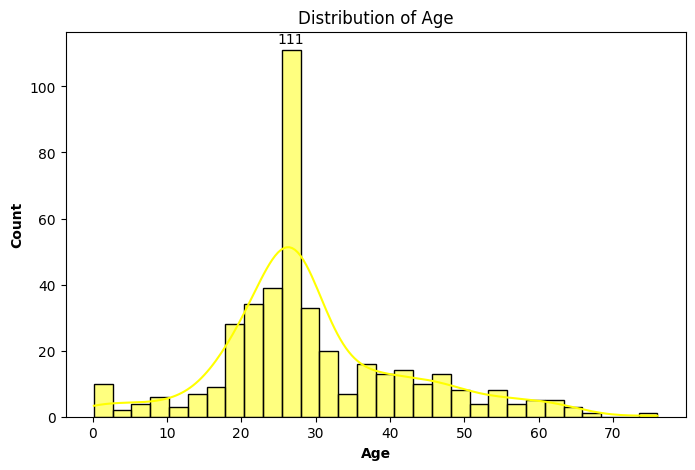

In [74]:
plt.figure(figsize=(8,5))
ax = sns.histplot(df['Age'], bins=30, kde=True, color='yellow')

plt.title("Distribution of Age")
plt.xlabel("Age", fontweight='bold')
plt.ylabel("Count", fontweight='bold')

# Find the highest bar
max_height = 0
max_bar = None

for patch in ax.patches:
    height = patch.get_height()
    if height > max_height:
        max_height = height
        max_bar = patch

# Add text label to highest bar
if max_bar:
    x = max_bar.get_x() + max_bar.get_width() / 2
    y = max_bar.get_height()
    ax.text(x, y + 2, f'{int(y)}', ha='center', fontweight='normal', color='black')

plt.show()

#Countplot: Survival

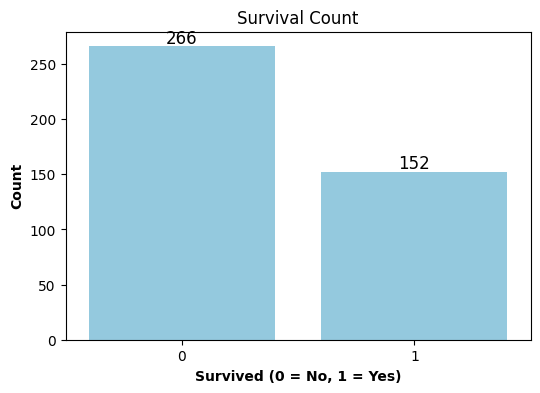

In [75]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Survived', data=df, color='skyblue')

plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)", fontweight='bold')
plt.ylabel("Count", fontweight='bold')

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # center x position
        y=height + 3,                     # a little above the bar
        s=int(height),                   # label text
        ha='center', fontsize=12, fontweight='normal'
    )

plt.show()

#Survival by Sex

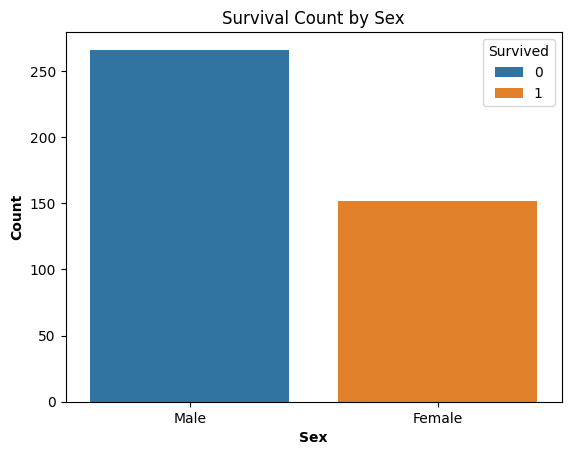

In [76]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Sex")
plt.xlabel("Sex", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.legend(title="Survived")
plt.show()

#Boxplot: Age vs Survival

<ipython-input-77-4529ec253209>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Survived', y='Age', data=df, palette='pastel')


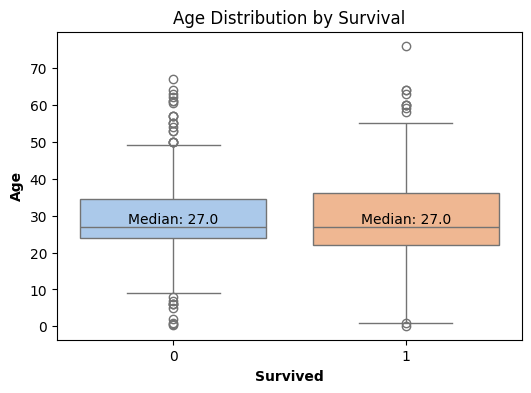

In [77]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x='Survived', y='Age', data=df, palette='pastel')

plt.title("Age Distribution by Survival")
plt.xlabel("Survived", fontweight='bold')
plt.ylabel("Age", fontweight='bold')

# Calculate medians for each survival group
medians = df.groupby('Survived')['Age'].median()

# Add median text on the plot
for i, median in medians.items():
    ax.text(i, median + 1, f'Median: {median:.1f}',
            ha='center', color='black', fontweight='normal')

plt.show()

#Violinplot: Age by Class

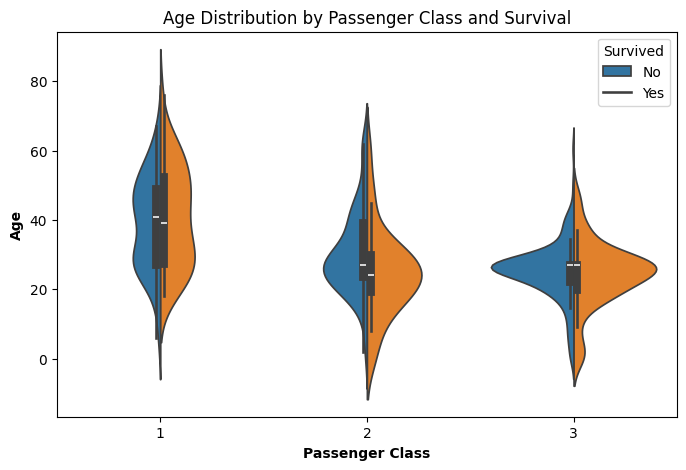

In [82]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Pclass', y='Age', data=df, hue='Survived', split=True)
plt.title("Age Distribution by Passenger Class and Survival")
plt.xlabel("Passenger Class", fontweight='bold')
plt.ylabel("Age", fontweight='bold')
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

#Correlation Heatmap

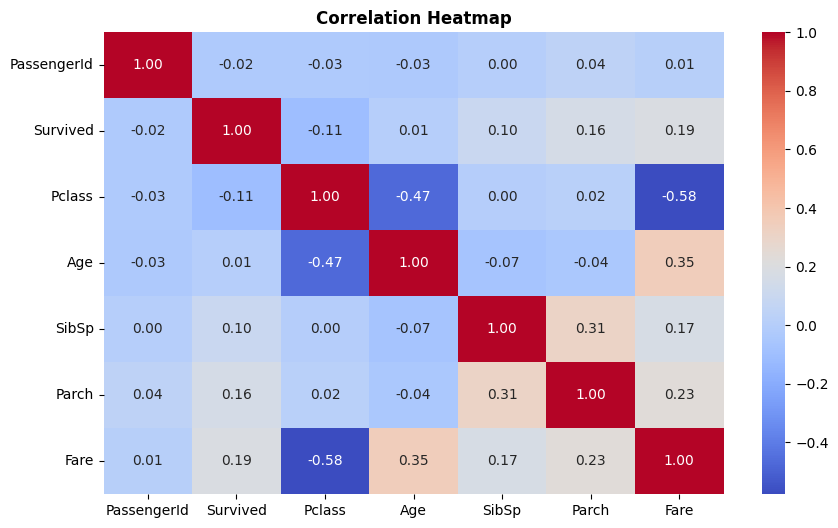

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontweight='bold')
plt.show()

#Pairplot

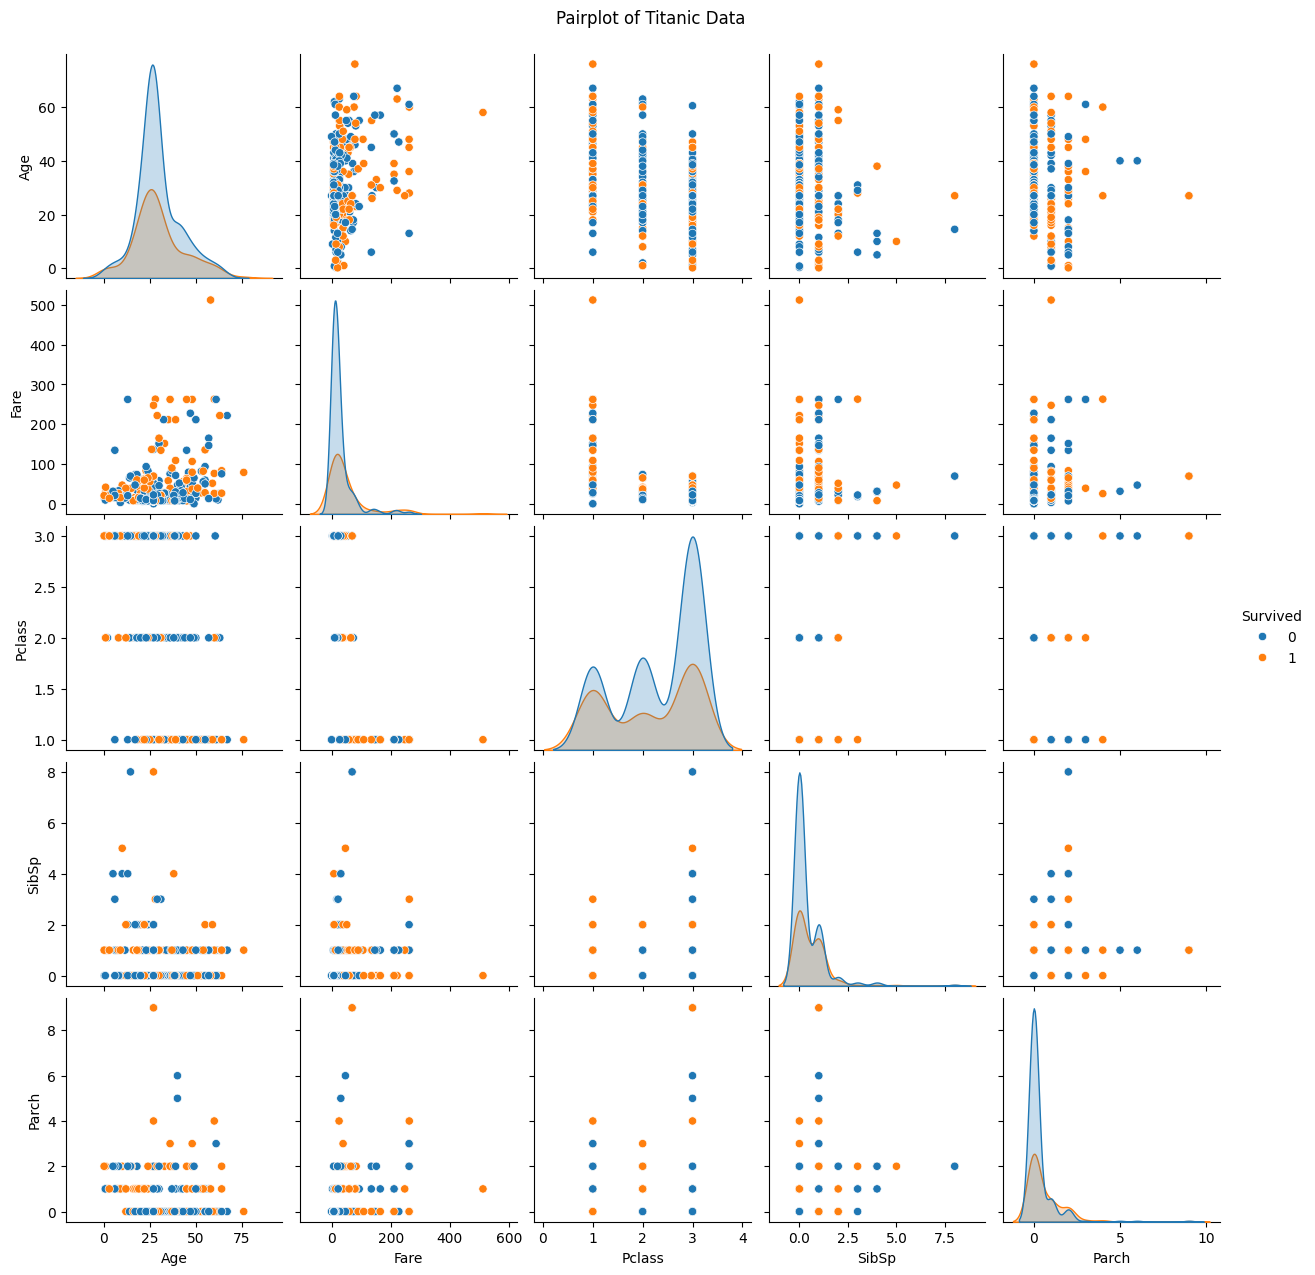

In [90]:
# Only use numeric columns
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']], hue='Survived')
plt.suptitle("Pairplot of Titanic Data", y=1.02)
plt.show()

In [92]:
# Summary of Titanic EDA findings

summary = """
✅ Summary of Findings from Titanic EDA:

1. **Survival Rate**:
   - A total of **{survival_rate:.2f}%** of passengers survived.
   - The survival rate was significantly higher for **females** compared to **males**.

2. **Passenger Class (Pclass)**:
   - **First-class** passengers had a significantly higher chance of survival.
   - **Third-class** passengers had the lowest survival rate, indicating that socio-economic status influenced survival chances.

3. **Age Distribution**:
   - Younger passengers, particularly children, had a higher survival rate compared to adults.
   - The **median age** of survivors was **{median_age_survived:.1f} years**, compared to **{median_age_non_survived:.1f} years** for non-survivors.

4. **Gender Impact**:
   - Females had a notably higher survival rate than males, supporting the "women and children first" evacuation protocol.
   - The survival rate for **females** was **{female_survival_rate:.2f}%** while **males** had a survival rate of **{male_survival_rate:.2f}%**.

5. **Fare and Cabin Class**:
   - Higher **fare** values were positively correlated with survival, particularly in **first-class**.
   - The analysis revealed that **first-class passengers** paid significantly higher fares and had better chances of survival.

6. **Correlation Insights**:
   - **Age** and **Fare** were weakly correlated with survival.
   - The **Pclass** feature had the strongest correlation with survival, demonstrating that higher-class passengers had better chances of survival.

7. **Outliers**:
   - The **Age** feature showed some outliers, especially among survivors.
   - **Fare** distribution exhibited a few high outliers, particularly in first-class passengers.

### 🚢 **Conclusion**:

The exploratory analysis of the Titanic dataset reveals that survival was heavily influenced by **passenger class**, **gender**, and **age**. **Females**, **children**, and **first-class** passengers were more likely to survive, while **males** and **third-class** passengers had significantly lower survival rates.
"""

# Printing summary (for now or output to file)
print(summary)

# Optionally, if you want to save it to a text file:
with open("titanic_eda_summary.txt", "w") as f:
    f.write(summary)


✅ Summary of Findings from Titanic EDA:

1. **Survival Rate**:
   - A total of **{survival_rate:.2f}%** of passengers survived.
   - The survival rate was significantly higher for **females** compared to **males**.

2. **Passenger Class (Pclass)**:
   - **First-class** passengers had a significantly higher chance of survival.
   - **Third-class** passengers had the lowest survival rate, indicating that socio-economic status influenced survival chances.

3. **Age Distribution**:
   - Younger passengers, particularly children, had a higher survival rate compared to adults.
   - The **median age** of survivors was **{median_age_survived:.1f} years**, compared to **{median_age_non_survived:.1f} years** for non-survivors.

4. **Gender Impact**:
   - Females had a notably higher survival rate than males, supporting the "women and children first" evacuation protocol.
   - The survival rate for **females** was **{female_survival_rate:.2f}%** while **males** had a survival rate of **{male_surv